# 2.3 Random Forests on Weather Data

### Contents:
1. Install Libraries
2. Import Libraries
3. Import Datasets
4. Random Forest Model - 2010s
5. Random Forest Model - By Station (Oslo, Maastricht, Kassel)

## 1. Install Libraries

## 2. Import Libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

## 3. Import Datasets

In [39]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [41]:
path = os.getcwd()
path

'/Users/kirstencurrie/ClimateWins Analysis/02 Scripts'

In [43]:
path = '/Users/kirstencurrie/ClimateWins Analysis'

In [45]:
climate = pd.read_parquet(os.path.join(path, '01 Datasets', '02 Prepared Data', 'weather_unscaled_clean.parquet'))
climate.head(1)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.0,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,0.83,1.0161,0.12,0.08,0.0,10.0,7.0,11.5,7,0.91,1.001,0.13,0.22,0.0,10.6,9.4,8.3,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.0,1.0173,0.2,0.0,0.0,-0.6,-1.9,0.5,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.92,1.026,0.53,0.0,1.4,7.6,4.4,10.8,5,0.67,0.2,0.1,0.0,6.9,1.1,10.4,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9,4,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98


In [47]:
pleasant = pd.read_csv(os.path.join(path, '01 Datasets', '01 Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
pleasant.head(1)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4. Random Forest Model - 2010s

In [50]:
#Define important features for later
ftr = ['cloud_cover',
       'humidity',
       'pressure',
       'global_radiation',
       'precipitation',
       'sunshine',
       'temp_mean',
       'temp_min',
       'temp_max',
      ]

In [52]:
#Convert Date column to date/time column
climate['DATE'] = pd.to_datetime(climate['DATE'], format='%Y%m%d')
pleasant['DATE'] = pd.to_datetime(climate['DATE'], format='%Y%m%d')
pleasant.head(1)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,1960-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
#Reduce weather data to 2010s
df = climate[(climate['DATE'].dt.year >= 2010) & (climate['DATE'].dt.year < 2020)]
df['DATE'].describe()

count                   3652
mean     2014-12-31 12:00:00
min      2010-01-01 00:00:00
25%      2012-07-01 18:00:00
50%      2014-12-31 12:00:00
75%      2017-07-01 06:00:00
max      2019-12-31 00:00:00
Name: DATE, dtype: object

In [56]:
#Reduce pleasant ratings to 2010s
pl = pleasant[(pleasant['DATE'].dt.year >= 2010) & (pleasant['DATE'].dt.year < 2020)]
pl['DATE'].describe()

count                   3652
mean     2014-12-31 12:00:00
min      2010-01-01 00:00:00
25%      2012-07-01 18:00:00
50%      2014-12-31 12:00:00
75%      2017-07-01 06:00:00
max      2019-12-31 00:00:00
Name: DATE, dtype: object

In [58]:
df.shape

(3652, 137)

In [60]:
df_1 = df.drop(['DATE', 'MONTH'], axis = 1)
df_1.head(1)

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
18263,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.0,0.7,5.0,3.6,7.8,4,0.78,1.0026,0.37,0.0,4.2,-1.6,-6.3,0.7,8,0.89,0.9997,0.12,0.02,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.0,6.4,1.6,-0.5,5.0,0.93,0.9981,0.12,0.2,0.0,-2.6,-3.0,-1.8,8,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.91,0.2,0.43,0.0,3.1,0.1,4.9,7,0.76,1.011,0.04,0.24,0.0,-7.7,-8.9,-4.9,4,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,6,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.8,1.0121,0.43,0.0,6.0,1.7,-1.6,5.0,8,1.0054,0.76


In [62]:
pl_1 = pl.drop(['DATE'], axis = 1)
pl_1.head(1)

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
#Define X & y for data split
X = df_1
y = pl_1

In [66]:
X.shape

(3652, 135)

In [68]:
y.shape

(3652, 15)

In [70]:
#Because y should be (3652), using sum of binary across all 15 stations (argmax would only look at the first station to produce a positive (1) rating
y = pl_1.sum(axis=1)
y.shape

(3652,)

In [72]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [74]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2921, 135) (2921,)
(731, 135) (731,)


In [98]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [102]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5430916552667578


In [104]:
#Define labels of stations for random forest plot
stn = ['BASEL',
       'BELGRADE',
       'BUDAPEST',
       'DEBILT',
       'DUSSELDORF',
       'HEATHROW',
       'KASSEL',
       'LJUBLJANA',
       'MAASTRICHT',
       'MADRID',
       'MUNCHENB',
       'OSLO',
       'SONNBLICK',
       'STOCKHOLM',
       'VALENTIA'
      ]

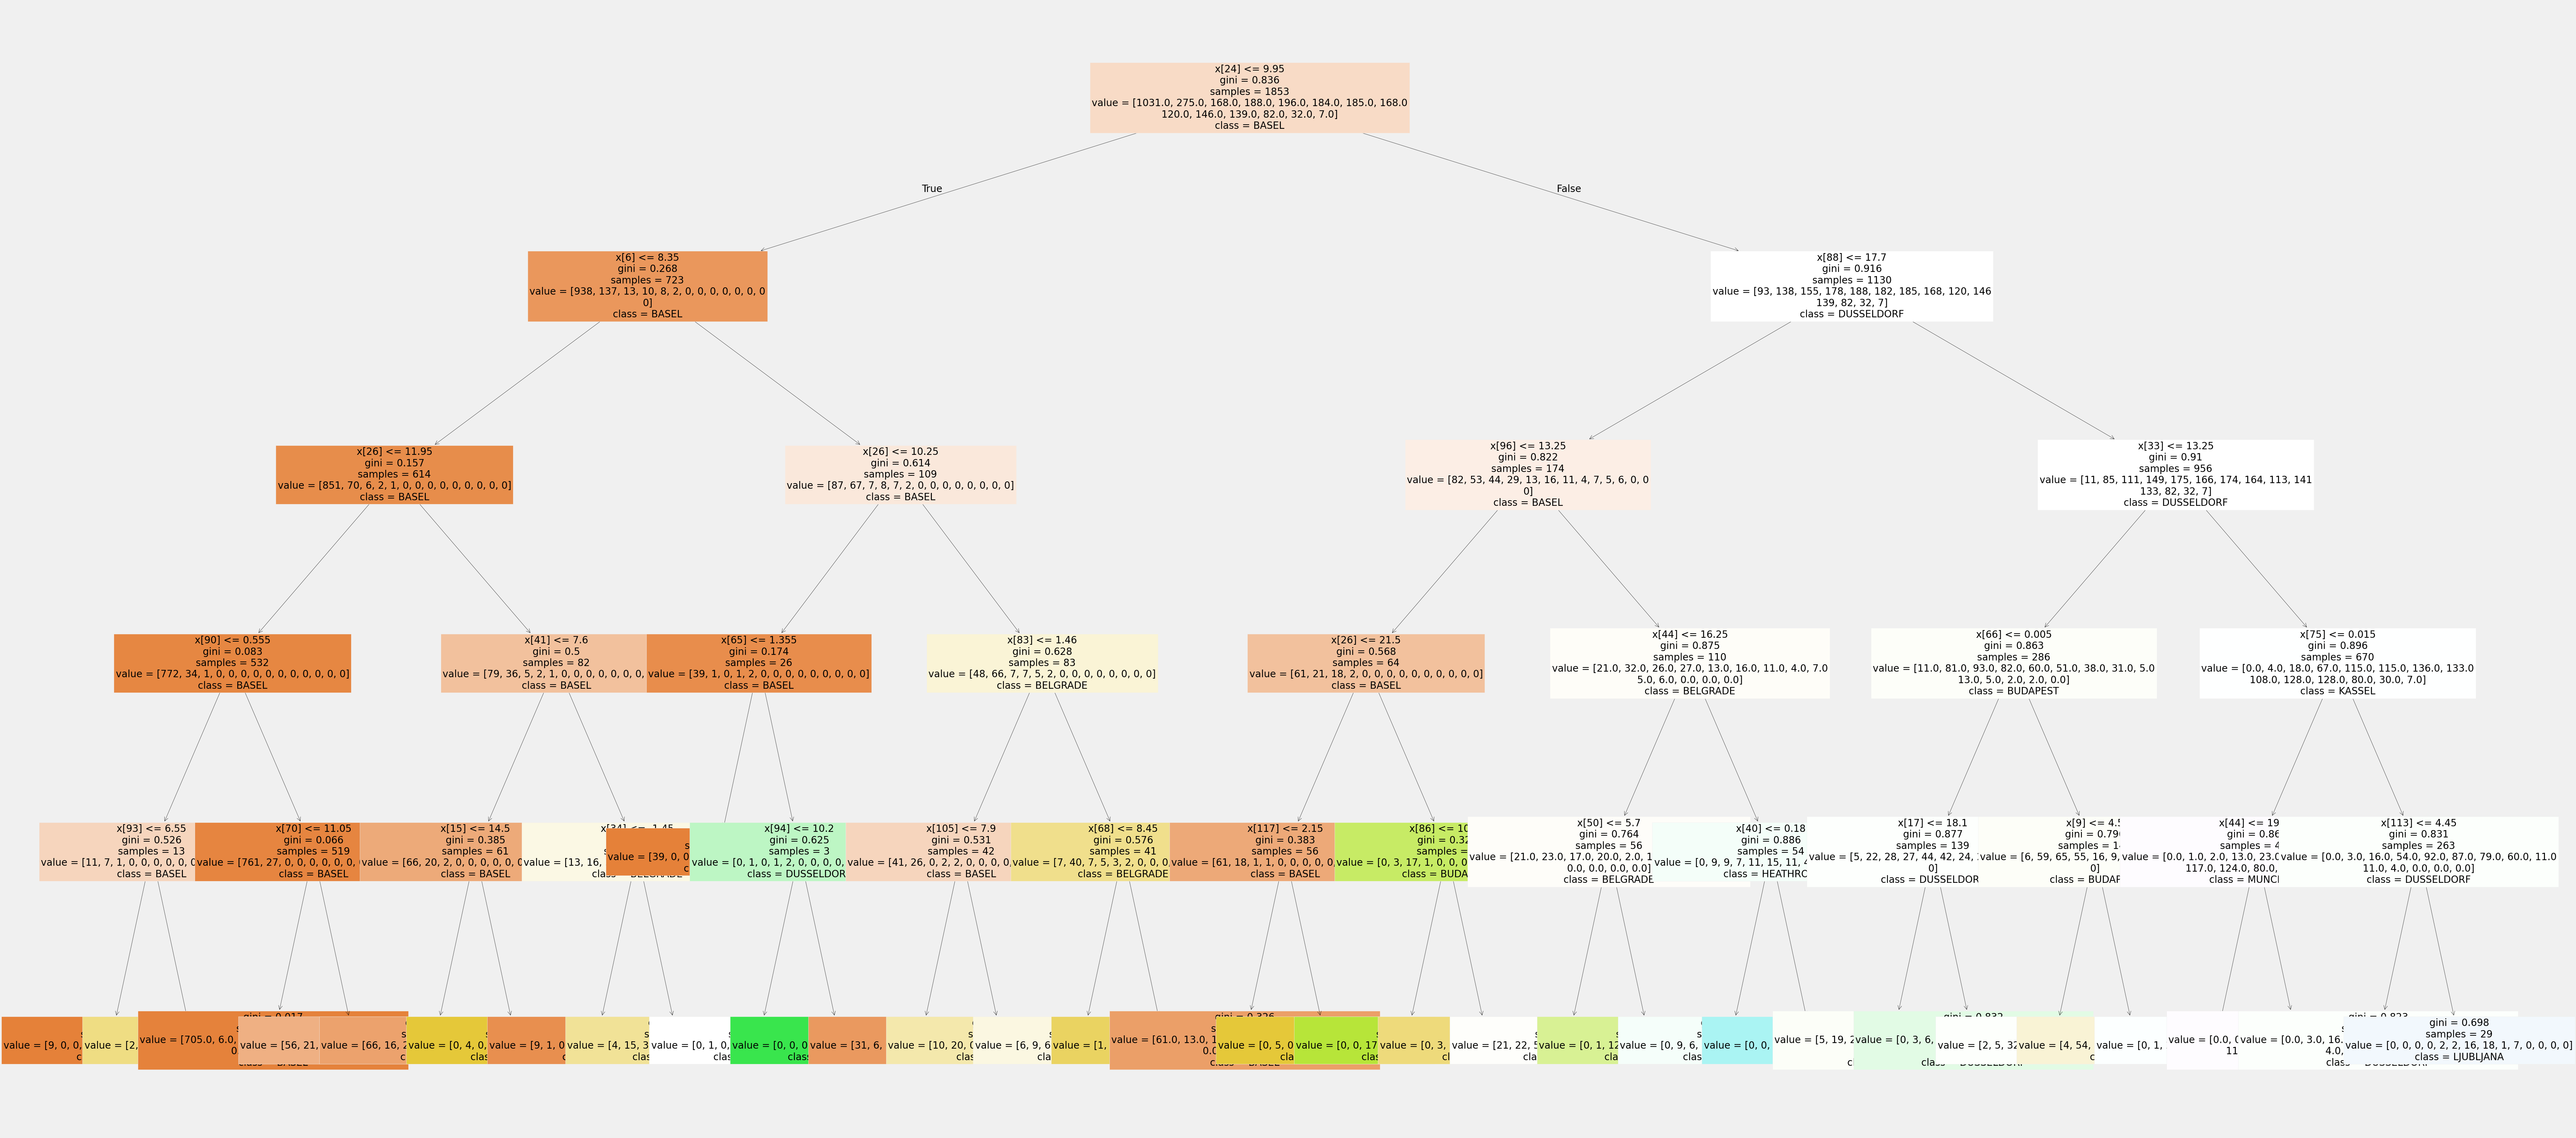

In [106]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=stn, filled=True);
plt.show()

In [108]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([2.14731323e-03, 9.05204368e-04, 5.71860349e-04, 3.19679957e-03,
       3.84799613e-03, 4.75247696e-03, 3.47933744e-02, 5.84495362e-03,
       2.30466207e-02, 5.73763476e-04, 9.26946522e-04, 1.72736784e-03,
       8.57481443e-04, 9.46770952e-04, 1.19709000e-03, 6.91831521e-03,
       1.21849836e-02, 9.08017093e-03, 3.84599801e-05, 0.00000000e+00,
       0.00000000e+00, 2.39773932e-04, 8.78782643e-04, 4.96183030e-05,
       4.10962831e-02, 9.62409024e-03, 6.20730497e-02, 1.48165734e-04,
       8.33688376e-04, 2.58759787e-03, 2.82278573e-03, 2.93718732e-03,
       1.28199836e-03, 1.02232527e-02, 6.09728782e-04, 4.66835467e-02,
       1.36770568e-03, 9.03856309e-04, 3.15392187e-03, 7.57135544e-03,
       6.67650701e-03, 3.21539231e-03, 2.35912378e-02, 8.68492075e-04,
       3.70953868e-02, 7.84524583e-04, 1.45800951e-03, 7.15719160e-04,
       3.38625684e-03, 6.93843459e-04, 1.61085872e-03, 1.45054550e-02,
       5.00770544e-04, 3.41727134e-02, 2.51965726e-04, 7.14082378e-04,
      

In [110]:
np.set_printoptions(threshold=1000)

In [112]:
newarray = newarray.reshape(-1,9,15)
print(newarray.shape)
newarray

(1, 9, 15)


array([[[2.14731323e-03, 9.05204368e-04, 5.71860349e-04, 3.19679957e-03,
         3.84799613e-03, 4.75247696e-03, 3.47933744e-02, 5.84495362e-03,
         2.30466207e-02, 5.73763476e-04, 9.26946522e-04, 1.72736784e-03,
         8.57481443e-04, 9.46770952e-04, 1.19709000e-03],
        [6.91831521e-03, 1.21849836e-02, 9.08017093e-03, 3.84599801e-05,
         0.00000000e+00, 0.00000000e+00, 2.39773932e-04, 8.78782643e-04,
         4.96183030e-05, 4.10962831e-02, 9.62409024e-03, 6.20730497e-02,
         1.48165734e-04, 8.33688376e-04, 2.58759787e-03],
        [2.82278573e-03, 2.93718732e-03, 1.28199836e-03, 1.02232527e-02,
         6.09728782e-04, 4.66835467e-02, 1.36770568e-03, 9.03856309e-04,
         3.15392187e-03, 7.57135544e-03, 6.67650701e-03, 3.21539231e-03,
         2.35912378e-02, 8.68492075e-04, 3.70953868e-02],
        [7.84524583e-04, 1.45800951e-03, 7.15719160e-04, 3.38625684e-03,
         6.93843459e-04, 1.61085872e-03, 1.45054550e-02, 5.00770544e-04,
         3.41727134e-02

In [114]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.07035678, 0.03233995, 0.04630689, 0.02504863, 0.12392249,
       0.07030971, 0.07303542, 0.01404949, 0.110949  , 0.06910968,
       0.0595197 , 0.13155403, 0.04377819, 0.07940202, 0.05031802])

In [118]:
important = pd.Series(sumarray, index = stn) #.sort_values(ascending = False)
important

BASEL         0.070357
BELGRADE      0.032340
BUDAPEST      0.046307
DEBILT        0.025049
DUSSELDORF    0.123922
HEATHROW      0.070310
KASSEL        0.073035
LJUBLJANA     0.014049
MAASTRICHT    0.110949
MADRID        0.069110
MUNCHENB      0.059520
OSLO          0.131554
SONNBLICK     0.043778
STOCKHOLM     0.079402
VALENTIA      0.050318
dtype: float64

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


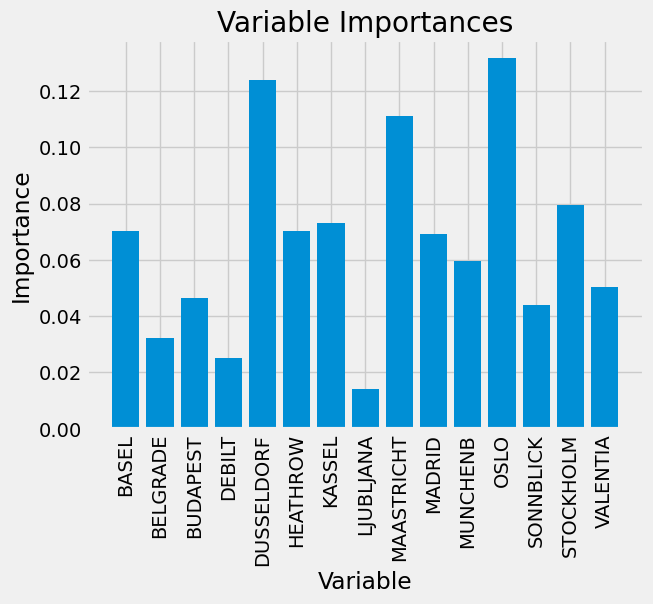

In [120]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(stn)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, stn, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()

## 5. Random Forest Model - By Station (Oslo, Maastricht, Kassel)

In [127]:
climate.columns.unique().tolist()

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSS

#### Oslo Dataframe

In [131]:
oslo = climate[['OSLO_cloud_cover',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max']]
oslo.head(1)

,OSLO_cloud_cover,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max
0,8,0.98,0.9978,0.04,1.14,0.0,4.9,3.8,5.9


In [135]:
oslo.shape

(22950, 9)

In [137]:
os_pl = pleasant[['OSLO_pleasant_weather']]
os_pl.head(1)

,OSLO_pleasant_weather
0,0


In [139]:
os_pl.shape

(22950, 1)

#### Maastricht Dataframe

In [176]:
maas = climate[[ 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max']]
maas.head(1)

,MAASTRICHT_cloud_cover,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max
0,7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1


In [178]:
maas.shape

(22950, 9)

In [180]:
ma_pl = pleasant[['MAASTRICHT_pleasant_weather']]
ma_pl.head(1)

,MAASTRICHT_pleasant_weather
0,0


#### Kassel Dataframe

In [183]:
kass = climate[['KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
'KASSEL_cloud_cover']]
kass.head(1)

,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,KASSEL_cloud_cover
0,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8


In [185]:
kass.shape

(22950, 9)

In [187]:
ka_pl = pleasant[['KASSEL_pleasant_weather']]
ka_pl.head(1)

,KASSEL_pleasant_weather
0,0


In [217]:
#Define X & y for data split
X = kass
y = ka_pl

In [219]:
#Because y should be (3652), using sum of binary across all 15 stations (argmax would only look at the first station to produce a positive (1) rating
y = ka_pl.sum(axis=1)
y.shape

(22950,)

In [221]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [223]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360,)
(4590, 9) (4590,)


In [225]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [227]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


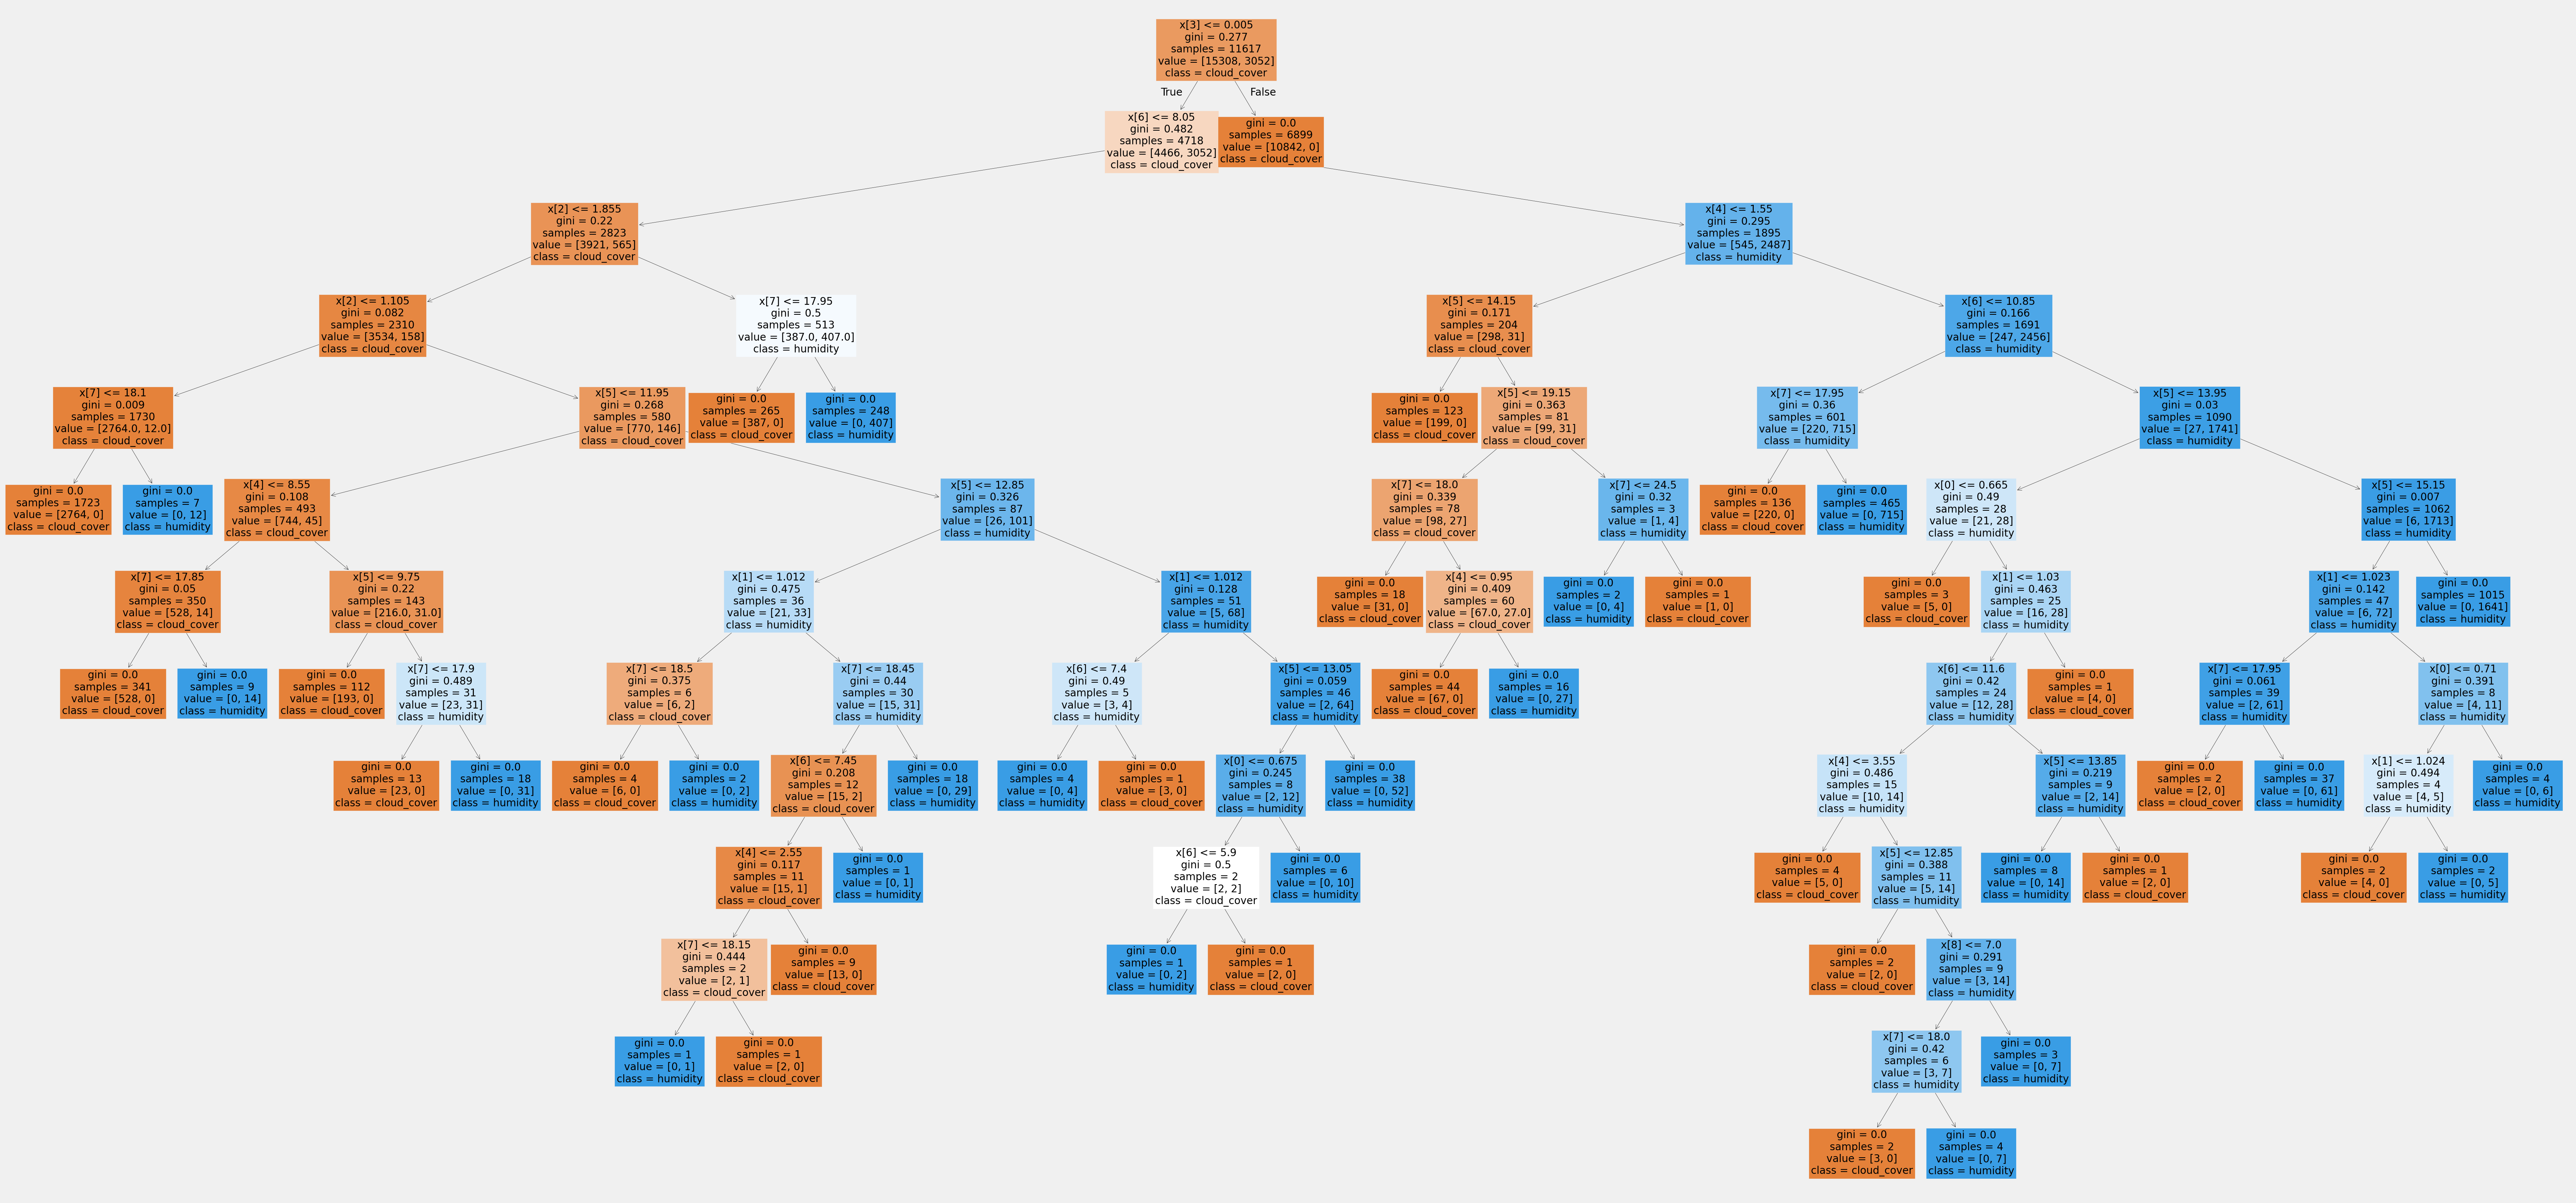

In [229]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=ftr, filled=True);
plt.show()

In [231]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.02449576, 0.01781092, 0.0875276 , 0.34389497, 0.09729529,
       0.11045343, 0.02360555, 0.29334803, 0.00156846])

In [233]:
np.set_printoptions(threshold=1000)

In [235]:
newarray = newarray.reshape(-1,1,9)
print(newarray.shape)
newarray

(1, 1, 9)


array([[[0.02449576, 0.01781092, 0.0875276 , 0.34389497, 0.09729529,
         0.11045343, 0.02360555, 0.29334803, 0.00156846]]])

In [237]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.02449576, 0.01781092, 0.0875276 , 0.34389497, 0.09729529,
       0.11045343, 0.02360555, 0.29334803, 0.00156846])

In [239]:
important = pd.Series(sumarray, index = ftr) #.sort_values(ascending = False)
important

cloud_cover         0.024496
humidity            0.017811
pressure            0.087528
global_radiation    0.343895
precipitation       0.097295
sunshine            0.110453
temp_mean           0.023606
temp_min            0.293348
temp_max            0.001568
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


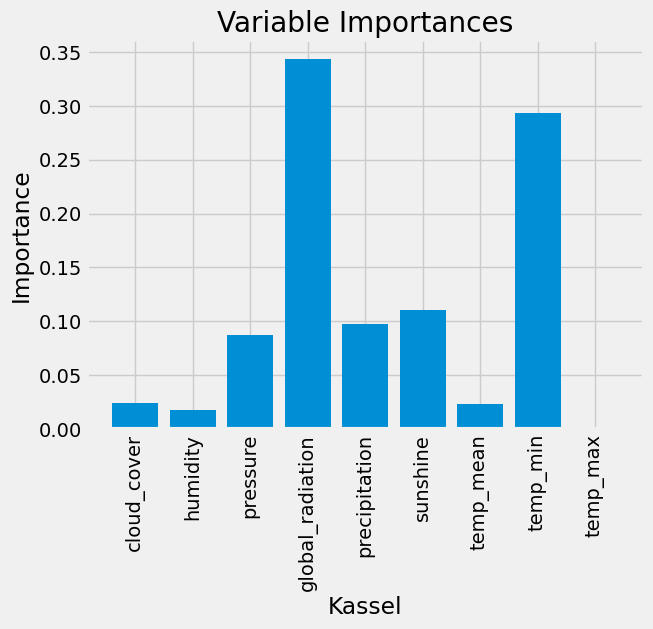

In [243]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(ftr)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, ftr, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Kassel'); plt.title('Variable Importances');
plt.show()